In [2]:
# 모듈 준비
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

# EDA

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [6]:
len(digits.target)

1797

In [7]:
# label 별로 균등한 것을 확인할 수 있다
Counter(digits.target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [8]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
len(digits.data)

1797

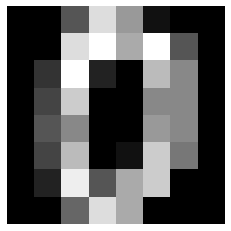

In [10]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

# Train,Test 데이터셋 설정

In [11]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2 , random_state = 777)

# Decision Tree ( 84.7% 정확도 )

In [12]:
decision_tree = DecisionTreeClassifier()

In [13]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = decision_tree.predict(x_test) 

In [15]:
accuracy_score(y_pred, y_test)

0.8472222222222222

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.84      0.86      0.85        36
           2       0.80      0.88      0.84        32
           3       0.84      1.00      0.92        27
           4       0.79      0.81      0.80        32
           5       0.86      0.88      0.87        42
           6       0.94      0.89      0.91        36
           7       0.85      0.87      0.86        39
           8       0.94      0.78      0.85        40
           9       0.86      0.79      0.82        38

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



# Random Forest ( 96.3% 정확도 )

In [16]:
RandomForest = RandomForestClassifier(random_state=777)

In [17]:
RandomForest.fit(x_train, y_train)

RandomForestClassifier(random_state=777)

In [18]:
y_pred = RandomForest.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.84      1.00      0.91        36
           2       1.00      0.94      0.97        32
           3       0.93      1.00      0.96        27
           4       1.00      0.97      0.98        32
           5       0.98      0.95      0.96        42
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        39
           8       1.00      0.88      0.93        40
           9       0.95      0.95      0.95        38

    accuracy                           0.96       360
   macro avg       0.97      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360



In [20]:
accuracy_score(y_pred, y_test)

0.9638888888888889

# SVM ( 97.7% 정확도 )

In [21]:
svm_model = svm.SVC()

In [22]:
svm_model.fit(x_test, y_test)

SVC()

In [23]:
y_pred = svm_model.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        32
           3       1.00      0.96      0.98        27
           4       1.00      1.00      1.00        32
           5       0.98      0.98      0.98        42
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        39
           8       0.95      0.93      0.94        40
           9       0.97      0.95      0.96        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [25]:
accuracy_score(y_pred, y_test)

0.9777777777777777

# SGD ( 93.6% 정확도 )

In [26]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.74      0.97      0.84        36
           2       0.97      0.97      0.97        32
           3       0.93      1.00      0.96        27
           4       1.00      0.94      0.97        32
           5       0.98      0.95      0.96        42
           6       0.97      0.97      0.97        36
           7       0.97      0.95      0.96        39
           8       1.00      0.70      0.82        40
           9       0.88      0.95      0.91        38

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



In [27]:
accuracy_score(y_pred, y_test)

0.9361111111111111

# LogisticRegression  ( 95% 정확도 )

In [28]:
logistic_model = LogisticRegression()

In [29]:
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.88      1.00      0.94        36
           2       0.97      0.97      0.97        32
           3       0.96      0.96      0.96        27
           4       0.97      0.94      0.95        32
           5       0.93      0.93      0.93        42
           6       0.97      0.97      0.97        36
           7       0.97      0.95      0.96        39
           8       1.00      0.85      0.92        40
           9       0.88      0.95      0.91        38

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
accuracy_score(y_pred, y_test)

0.95

# 평가지표 선택 및 이유

target의 label이 9가지 클래스에 대해 상당히 균일하게 분포한 점을 고려할 때.
Accuracy를 평가지표로 채택함에 무리가 없을 것으로 판단하였다.
Accuracy를 기준으로 판단한 경우. 4가지 모델 중 SVM 모델이 97.7%로 가장 높은 Accuracy를 보였다.